# Basic python usage



## Basic math



Python is a basic calculator out of the box. Here we consider the most basic mathematical operations: addition, subtraction, multiplication, division and exponenetiation. we use the func:print to get the output. For now we consider integers and float numbers. An integer is a plain number like 0, 10 or -2345. A float number has a decimal in it. The following are all floats: 1.0, -9., and 3.56. Note the trailing zero is not required, although it is good style. Note that here you see some features of float math; the second answer is 3.1, but that cannot be represented exactly as a float number here, so you see something that is close.



In [1]:
print(2 + 4)
print(8.1 - 5)

6
3.0999999999999996


Multiplication is equally straightforward.



In [2]:
print(5 * 4)
print(3.1 * 2)

20
6.2


Division is almost as straightforward, but we have to remember that integer division is not the same as float division. Let us consider float division first.



In [3]:
print(4.0 / 2.0)
print(1.0 / 3.1)

2.0
0.3225806451612903


Now, consider the integer versions. In Python3 division now is automatically float division. You can do integer division with the // operator like this.



In [4]:
print(4 // 2)
print(1 // 3)

2
0


Exponentiation is also a basic math operation that python supports directly.



In [5]:
print(3.0**2)
print(3**2)
print(2**0.5)

9.0
9
1.4142135623730951


Other types of mathematical operations require us to import functionality from python libraries. We consider those in the next section.



## Advanced mathematical operators



The primary library we will consider is mod:numpy, which provides many mathematical functions, statistics as well as support for linear algebra. For a complete listing of the functions available, see [http://docs.scipy.org/doc/numpy/reference/routines.math.html](http://docs.scipy.org/doc/numpy/reference/routines.math.html). We begin with the simplest functions.



In [6]:
import numpy as np

print(np.sqrt(2))

1.4142135623730951


### Exponential and logarithmic functions



Here is the exponential function.



In [7]:
import numpy as np

print(np.exp(1))

2.718281828459045


There are two logarithmic functions commonly used, the natural log function func:numpy.log and the base10 logarithm func:numpy.log10.



In [8]:
import numpy as np

print(np.log(10))
print(np.log10(10))  # base10

2.302585092994046
1.0


There are many other intrinsic functions available in mod:numpy which we will eventually cover. First, we need to consider how to create our own functions.



## Creating your own functions



We can combine operations to evaluate complex equations. Consider the value of the equation $x^3 - \log(x)$ for the value $x=4.1$.



In [9]:
x = 3
print(x**3 - np.log(x))

25.90138771133189


It would be tedious to type this out each time. Next, we learn how to express this equation as a new function, which we can call with different values.



In [10]:
def f(x):
    return x**3 - np.log(x)


print(f(3))
print(f(5.1))

25.90138771133189
131.0217594602697


It may not seem like we did much there, but this is the foundation for solving equations in the future. Before we get to solving equations, we have a few more details to consider. Next, we consider evaluating functions on arrays of values.



## Defining functions in python



Compare what's here to the [Matlab implementation. ](http://matlab.cheme.cmu.edu/2011/08/09/where-its-i-got-two-turntables-and-a-microphone/)

We often need to make functions in our codes to do things. This function works for scalar values, but it does not work for a list.



In [11]:
def f(x):
    "return the inverse square of x"
    return 1.0 / x**2


print(f(3))
print(f([4, 5]))

0.1111111111111111


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Note that functions are not automatically vectorized. That is why we see the error above. There are a few ways to achieve that. One is to "cast" the input variables to objects that support vectorized operations, such as numpy.array objects.



In [12]:
def f(x):
    "return the inverse square of x"
    x = np.array(x)  # Make sure the input is an array
    return 1.0 / x**2


print(f(3))
print(f([4, 5]))

0.1111111111111111
[0.0625 0.04  ]


It is possible to have more than one variable.



In [13]:
def func(x, y):
    "return product of x and y"
    return x * y


print(func(2, 3))
print(func(np.array([2, 3]), np.array([3, 4])))

6
[ 6 12]


You can define "lambda" functions, which are also known as inline or anonymous functions. The syntax is `lambda var:f(var)`. I think these are hard to read and discourage their use. Here is a typical usage where you have to define a simple function that is passed to another function, e.g. scipy.integrate.quad to perform an integral.



In [14]:
from scipy.integrate import quad

print(quad(lambda x: x**3, 0, 2))

(4.0, 4.440892098500626e-14)


It is possible to nest functions inside of functions like this.



In [15]:
def wrapper(x):
    a = 4

    def func(x, a):
        return a * x

    return func(x, a)


print(wrapper(4))

16


An alternative approach is to "wrap" a function, say to fix a parameter. You might do this so you can integrate the wrapped function, which depends on only a single variable, whereas the original function depends on two variables.



In [16]:
def func(x, a):
    return a * x


def wrapper(x):
    a = 4
    return func(x, a)


print(wrapper(4))

16


Last example, defining a function for an ode:



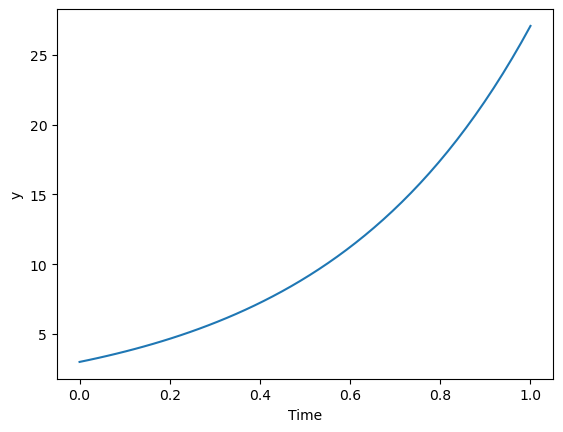

In [17]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

k = 2.2


def myode(y, t):
    "ode defining exponential growth"
    return k * y


y0 = 3
tspan = np.linspace(0, 1)
y = odeint(myode, y0, tspan)

plt.plot(tspan, y)
plt.xlabel("Time")
plt.ylabel("y");

## Advanced function creation



Python has some nice features in creating functions. You can create default values for variables, have optional variables and optional keyword variables. In this function f(a,b), `a` and `b` are called positional arguments, and they are required, and must be provided in the same order as the function defines.

If we provide a default value for an argument, then the argument is called a keyword argument, and it becomes optional. You can combine positional arguments and keyword arguments, but positional arguments must come first. Here is an example.



In [18]:
def func(a, n=2):
    "compute the nth power of a"
    return a**n


# three different ways to call the function
print(func(2))
print(func(2, 3))
print(func(2, n=4))

4
8
16


In the first call to the function, we only define the argument `a`, which is a mandatory, positional argument. In the second call, we define `a` and `n`, in the order they are defined in the function. Finally, in the third call, we define `a` as a positional argument, and `n` as a keyword argument.

If all of the arguments are optional, we can even call the function with no arguments. If you give arguments as positional arguments, they are used in the order defined in the function. If you use keyword arguments, the order is arbitrary.



In [19]:
def func(a=1, n=2):
    "compute the nth power of a"
    return a**n


# three different ways to call the function
print(func())
print(func(2, 4))
print(func(n=4, a=2))

1
16
16


It is occasionally useful to allow an arbitrary number of arguments in a function. Suppose we want a function that can take an arbitrary number of positional arguments and return the sum of all the arguments. We use the syntax `*args` to indicate arbitrary positional arguments. Inside the function the variable `args` is a tuple containing all of the arguments passed to the function.



In [20]:
def func(*args):
    sum = 0
    for arg in args:
        sum += arg
    return sum


print(func(1, 2, 3, 4))

10


A more "functional programming" version of the last function is given here. This is an advanced approach that is less readable to new users, but more compact and likely more efficient for large numbers of arguments.



In [21]:
import functools, operator


def func(*args):
    return functools.reduce(operator.add, args)


print(func(1, 2, 3, 4))

10


It is possible to have arbitrary keyword arguments. This is a common pattern when you call another function within your function that takes keyword arguments. We use `**kwargs` to indicate that arbitrary keyword arguments can be given to the function. Inside the function, kwargs is variable containing a dictionary of the keywords and values passed in.



In [22]:
def func(**kwargs):
    for kw in kwargs:
        print("{0} = {1}".format(kw, kwargs[kw]))


func(t1=6, color="blue")

t1 = 6
color = blue


A typical example might be:



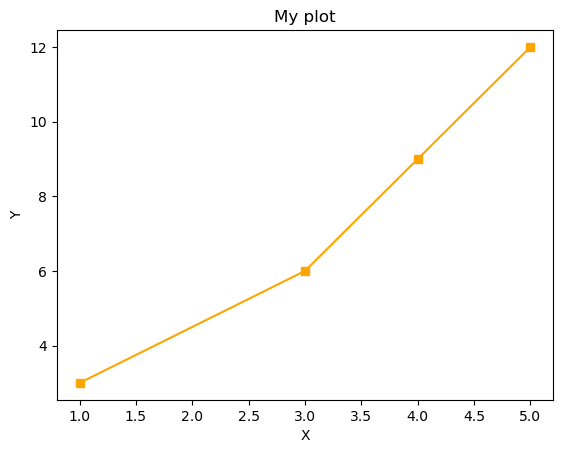

In [23]:
import matplotlib.pyplot as plt


def myplot(x, y, fname=None, **kwargs):
    "make plot of x,y. save to fname if not None. Provide kwargs to plot."
    plt.plot(x, y, **kwargs)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("My plot")
    if fname:
        plt.savefig(fname)


x = [1, 3, 4, 5]
y = [3, 6, 9, 12]

myplot(x, y, "images/myfig.png", color="orange", marker="s")

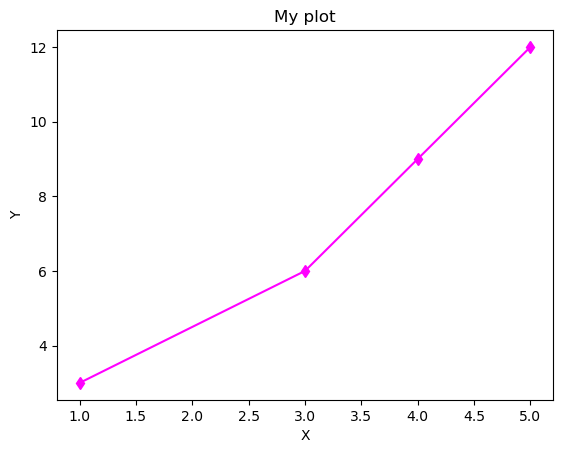

In [24]:
# you can use a dictionary as kwargs
d = {"color": "magenta", "marker": "d"}

myplot(x, y, "images/myfig2.png", **d)

In that example we wrap the matplotlib plotting commands in a function, which we can call the way we want to, with arbitrary optional arguments. In this example, you cannot pass keyword arguments that are illegal to the plot command or you will get an error.

It is possible to combine all the options at once. I admit it is hard to imagine where this would be really useful, but it can be done!



In [25]:
import numpy as np


def func(a, b=2, *args, **kwargs):
    "return a**b + sum(args) and print kwargs"
    for kw in kwargs:
        print("kw: {0} = {1}".format(kw, kwargs[kw]))

    return a**b + np.sum(args)


print(func(2, 3, 4, 5, mysillykw="hahah"))

kw: mysillykw = hahah
17


## Lambda Lambda Lambda



Is that some kind of fraternity? of anonymous functions? What is that!? There are many times where you need a callable, small function in python, and it is inconvenient to have to use `def` to create a named function. Lambda functions solve this problem. Let us look at some examples. First, we create a lambda function, and assign it to a variable. Then we show that variable is a function, and that we can call it with an argument.



In [26]:
f = lambda x: 2 * x
print(f)
print(f(2))

<function <lambda> at 0x11a14f130>
4


We can have more than one argument:



In [27]:
f = lambda x, y: x + y
print(f)
print(f(2, 3))

<function <lambda> at 0x11a14f400>
5


And default arguments:



In [28]:
f = lambda x, y=3: x + y
print(f)
print(f(2))
print(f(4, 1))

<function <lambda> at 0x118f4e0e0>
5
5


It is also possible to have arbitrary numbers of positional arguments. Here is an example that provides the sum of an arbitrary number of arguments.



In [29]:
import functools, operator

f = lambda *x: functools.reduce(operator.add, x)
print(f)

print(f(1))
print(f(1, 2))
print(f(1, 2, 3))

<function <lambda> at 0x11a14f130>
1
3
6


You can also make arbitrary keyword arguments. Here we make a function that simply returns the kwargs as a dictionary. This feature may be helpful in passing kwargs to other functions.



In [30]:
f = lambda **kwargs: kwargs

print(f(a=1, b=3))

{'a': 1, 'b': 3}


Of course, you can combine these options. Here is a function with all the options.



In [31]:
f = lambda a, b=4, *args, **kwargs: (a, b, args, kwargs)

print(f("required", 3, "optional-positional", g=4))

('required', 3, ('optional-positional',), {'g': 4})


One of the primary limitations of lambda functions is they are limited to single expressions. They also do not have documentation strings, so it can be difficult to understand what they were written for later.



### Applications of lambda functions



Lambda functions are used in places where you need a function, but may not want to define one using `def`. For example, say you want to solve the nonlinear equation $\sqrt{x} = 2.5$.



In [32]:
from scipy.optimize import root
import numpy as np

sol = root(lambda x: 2.5 - np.sqrt(x), 8)
print(sol)

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.776e-15]
       x: [ 6.250e+00]
    nfev: 7
    fjac: [[-1.000e+00]]
       r: [ 2.000e-01]
     qtf: [-1.754e-09]


Another time to use lambda functions is if you want to set a particular value of a parameter in a function. Say we have a function with an independent variable, $x$ and a parameter $a$, i.e. $f(x; a)$. If we want to find a solution $f(x; a) = 0$ for some value of $a$, we can use a lambda function to make a function of the single variable $x$. Here is a example.



In [33]:
import numpy as np


def func(x, a):
    return a * np.sqrt(x) - 4.0


sol = root(lambda x: func(x, 3.2), 3)
print(sol)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 9.770e-15]
       x: [ 1.563e+00]
    nfev: 8
    fjac: [[-1.000e+00]]
       r: [-1.280e+00]
     qtf: [-4.851e-09]


Any function that takes a function as an argument can use lambda functions. Here we use a lambda function that adds two numbers in the `reduce` function to sum a list of numbers.



In [34]:
import functools as ft

print(ft.reduce(lambda x, y: x + y, [0, 1, 2, 3, 4]))

10


We can evaluate the integral $\int_0^2 x^2 dx$ with a lambda function.



In [35]:
from scipy.integrate import quad

print(quad(lambda x: x**2, 0, 2))

(2.666666666666667, 2.960594732333751e-14)


### Summary



Lambda functions can be helpful. They are never necessary. You can always define a function using `def`, but for some small, single-use functions, a lambda function could make sense. Lambda functions have some limitations, including that they are limited to a single expression, and they lack documentation strings.



## Creating arrays in python



Often, we will have a set of 1-D arrays, and we would like to construct a 2D array with those vectors as either the rows or columns of the array. This may happen because we have data from different sources we want to combine, or because we organize the code with variables that are easy to read, and then want to combine the variables. Here are examples of doing that to get the vectors as the columns.



In [36]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(np.column_stack([a, b]))

# this means stack the arrays vertically, e.g. on top of each other
print(np.vstack([a, b]).T)

[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


Or rows:



In [37]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(np.row_stack([a, b]))

# this means stack the arrays vertically, e.g. on top of each other
print(np.vstack([a, b]))

[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]


The opposite operation is to extract the rows or columns of a 2D array into smaller arrays. We might want to do that to extract a row or column from a calculation for further analysis, or plotting for example. There are splitting functions in numpy. They are somewhat confusing, so we examine some examples. The numpy.hsplit command splits an array "horizontally". The best way to think about it is that the "splits" move horizontally across the array. In other words, you draw a vertical split, move over horizontally, draw another vertical split, etc&#x2026; You must specify the number of splits that you want, and the array must be evenly divisible by the number of splits.



In [38]:
A = np.array([[1, 2, 3, 5], [4, 5, 6, 9]])

# split into two parts
p1, p2 = np.hsplit(A, 2)
print(p1)
print(p2)

# split into 4 parts
p1, p2, p3, p4 = np.hsplit(A, 4)
print(p1)
print(p2)
print(p3)
print(p4)

[[1 2]
 [4 5]]
[[3 5]
 [6 9]]
[[1]
 [4]]
[[2]
 [5]]
[[3]
 [6]]
[[5]
 [9]]


In the numpy.vsplit command the "splits" go "vertically" down the array. Note that the split commands return 2D arrays.



In [39]:
A = np.array([[1, 2, 3, 5], [4, 5, 6, 9]])

# split into two parts
p1, p2 = np.vsplit(A, 2)
print(p1)
print(p2)
print(p2.shape)

[[1 2 3 5]]
[[4 5 6 9]]
(1, 4)


An alternative approach is array unpacking. In this example, we unpack the array into two variables. The array unpacks by row.



In [40]:
A = np.array([[1, 2, 3, 5], [4, 5, 6, 9]])

# split into two parts
p1, p2 = A
print(p1)
print(p2)

[1 2 3 5]
[4 5 6 9]


To get the columns, just transpose the array.



In [41]:
A = np.array([[1, 2, 3, 5], [4, 5, 6, 9]])

# split into two parts
p1, p2, p3, p4 = A.T
print(p1)
print(p2)
print(p3)
print(p4)
print(p4.shape)

[1 4]
[2 5]
[3 6]
[5 9]
(2,)


Note that now, we have 1D arrays.

You can also access rows and columns by indexing. We index an array by [row, column]. To get a row, we specify the row number, and all the columns in that row like this [row, :]. Similarly, to get a column, we specify that we want all rows in that column like this: [:, column]. This approach is useful when you only want a few columns or rows.



In [42]:
A = np.array([[1, 2, 3, 5], [4, 5, 6, 9]])

# get row 1
print(A[1])
print(A[1, :])  # row 1, all columns

print(A[:, 2])  # get third column
print(A[:, 2].shape)

[4 5 6 9]
[4 5 6 9]
[3 6]
(2,)


Note that even when we specify a column, it is returned as a 1D array.



## Functions on arrays of values



It is common to evaluate a function for a range of values. Let us consider the value of the function $f(x) = \cos(x)$ over the range of $0 < x < \pi$. We cannot consider every value in that range, but we can consider say 10 points in the range. The func:numpy.linspace conveniently creates an array of values.



In [43]:
print(np.linspace(0, np.pi, 10))

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]


The main point of using the mod:numpy functions is that they work element-wise on elements of an array. In this example, we compute the $\cos(x)$ for each element of $x$.



In [44]:
x = np.linspace(0, np.pi, 10)
print(np.cos(x))

[ 1.          0.93969262  0.76604444  0.5         0.17364818 -0.17364818
 -0.5        -0.76604444 -0.93969262 -1.        ]


You can already see from this output that there is a root to the equation $\cos(x) = 0$, because there is a change in sign in the output. This is not a very convenient way to view the results; a graph would be better.  We use mod:matplotlib to make figures. Here is an example.



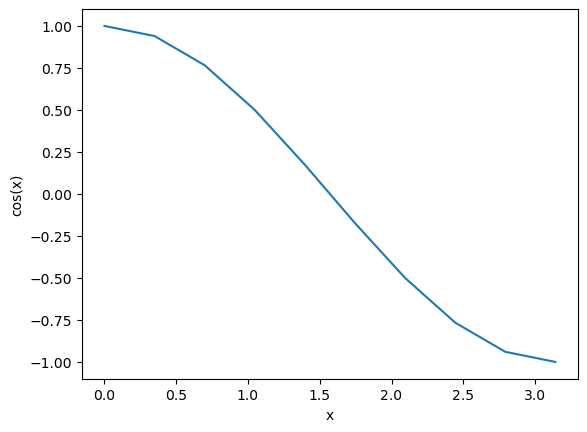

In [45]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi, 10)
plt.plot(x, np.cos(x))
plt.xlabel("x")
plt.ylabel("cos(x)");

This figure illustrates graphically what the numbers above show. The function crosses zero at approximately $x = 1.5$. To get a more precise value, we must actually solve the function numerically. We use the function func:scipy.optimize.fsolve to do that. More precisely, we want to solve the equation $f(x) = \cos(x) = 0$. We create a function that defines that equation, and then use func:scipy.optimize.fsolve to solve it.



In [46]:
from scipy.optimize import root
import numpy as np


def f(x):
    return np.cos(x)


sol = root(f, x0=1.5)  # the comma after sol makes it return a float
print(sol)
print(np.pi / 2)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 6.123e-17]
       x: [ 1.571e+00]
    nfev: 11
    fjac: [[-1.000e+00]]
       r: [ 0.000e+00]
     qtf: [-6.123e-17]
1.5707963267948966


We know the solution is &pi;/2.



## Some basic data structures in python



[Matlab post](http://matlab.cheme.cmu.edu/2011/09/26/some-basic-data-structures-in-matlab/)

We often have a need to organize data into structures when solving problems.



### the list



A list in python is data separated by commas in square brackets. Here, we might store the following data in a variable to describe the Antoine coefficients for benzene and the range they are relevant for [Tmin Tmax]. Lists are flexible, you can put anything in them, including other lists. We access the elements of the list by indexing:



In [47]:
c = ["benzene", 6.9056, 1211.0, 220.79, [-16, 104]]
print(c[0])
print(c[-1])

a, b = c[0:2]
print(a, b)

name, A, B, C, Trange = c
print(Trange)

benzene
[-16, 104]
benzene 6.9056
[-16, 104]


Lists are "mutable", which means you can change their values.



In [48]:
a = [3, 4, 5, [7, 8], "cat"]
print(a[0], a[-1])
a[-1] = "dog"
print(a)

3 cat
[3, 4, 5, [7, 8], 'dog']


### tuples



Tuples are *immutable*; you cannot change their values. This is handy in cases where it is an error to change the value. A tuple is like a list but it is enclosed in parentheses.



In [49]:
a = (3, 4, 5, [7, 8], "cat")
print(a[0], a[-1])
a[-1] = "dog"  # this is an error

3 cat


TypeError: 'tuple' object does not support item assignment

### struct



Python does not exactly have the same thing as a struct in Matlab. You can achieve something like it by defining an empty class and then defining attributes of the class. You can check if an object has a particular attribute using hasattr.



In [50]:
class Antoine:
    pass


a = Antoine()
a.name = "benzene"
a.Trange = [-16, 104]

print(a.name)
print(hasattr(a, "Trange"))
print(hasattr(a, "A"))

benzene
True
False


### dictionaries



The analog of the containers.Map in Matlab is the dictionary in python. Dictionaries are enclosed in curly brackets, and are composed of key:value pairs.



In [51]:
s = {"name": "benzene", "A": 6.9056, "B": 1211.0}

s["C"] = 220.79
s["Trange"] = [-16, 104]

print(s)
print(s["Trange"])

{'name': 'benzene', 'A': 6.9056, 'B': 1211.0, 'C': 220.79, 'Trange': [-16, 104]}
[-16, 104]


In [52]:
s = {"name": "benzene", "A": 6.9056, "B": 1211.0}

print("C" in s)
# default value for keys not in the dictionary
print(s.get("C", None))

print(s.keys())
print(s.values())

False
None
dict_keys(['name', 'A', 'B'])
dict_values(['benzene', 6.9056, 1211.0])


### Summary



We have examined four data structures in python. Note that none of these types are arrays/vectors with defined mathematical operations. For those, you need to consider numpy.array.



## Indexing vectors and arrays in Python



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/24/indexing-vectors-and-arrays-in-matlab/)

There are times where you have a lot of data in a vector or array and you want to extract a portion of the data for some analysis. For example, maybe you want to plot column 1 vs column 2, or you want the integral of data between x = 4 and x = 6, but your vector covers 0 < x < 10. Indexing is the way to do these things.

A key point to remember is that in python array/vector indices start at 0. Unlike Matlab, which uses parentheses to index a array, we use brackets in python.



In [53]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 10)
print(x)

print(x[0])  # first element
print(x[2])  # third element
print(x[-1])  # last element
print(x[-2])  # second to last element

[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
-3.141592653589793
-1.7453292519943295
3.141592653589793
2.443460952792061


We can select a range of elements too. The syntax a:b extracts the a<sup>th</sup> to (b-1)<sup>th</sup> elements. The syntax a:b:n starts at a, skips nelements up to the index b.



In [54]:
print(x[1:4])  # second to fourth element. Element 5 is not included
print(x[0:-1:2])  # every other element
print(x[:])  # print the whole vector
print(x[-1:0:-1])  # reverse the vector!

[-2.44346095 -1.74532925 -1.04719755]
[-3.14159265 -1.74532925 -0.34906585  1.04719755  2.44346095]
[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
[ 3.14159265  2.44346095  1.74532925  1.04719755  0.34906585 -0.34906585
 -1.04719755 -1.74532925 -2.44346095]


Suppose we want the part of the vector where x > 2. We could do that by inspection, but there is a better way. We can create a mask of boolean (0 or 1) values that specify whether x > 2 or not, and then use the mask as an index.



In [55]:
print(x[x > 2])

[2.44346095 3.14159265]


You can use this to analyze subsections of data, for example to integrate the function y = sin(x) where x > 2.



In [56]:
y = np.sin(x)

print(np.trapz(x[x > 2], y[x > 2]))

-1.7950016288086892


### 2d arrays



In 2d arrays, we use  row, column notation. We use a : to indicate all rows or all columns.



In [57]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(a[0, 0])
print(a[-1, -1])

print(a[0, :])  # row one
print(a[:, 0])  # column one
print(a[:])

1
9
[1 2 3]
[1 4 7]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Using indexing to assign values to rows and columns



In [58]:
b = np.zeros((3, 3))
print(b)

b[:, 0] = [1, 2, 3]  # set column 0
b[2, 2] = 12  # set a single element
print(b)

b[2] = 6  # sets everything in row 2 to 6!
print(b)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 3.  0. 12.]]
[[1. 0. 0.]
 [2. 0. 0.]
 [6. 6. 6.]]


Python does not have the linear assignment method like Matlab does. You can achieve something like that as follows. We flatten the array to 1D, do the linear assignment, and reshape the result back to the 2D array.



In [59]:
c = b.flatten()
c[2] = 34
b[:] = c.reshape(b.shape)
print(b)

[[ 1.  0. 34.]
 [ 2.  0.  0.]
 [ 6.  6.  6.]]


### 3D arrays



The 3d array is like book of 2D matrices. Each page has a 2D matrix on it. think about the indexing like this: (row, column, page)



In [60]:
M = np.random.uniform(size=(3, 3, 3))  # a 3x3x3 array
print(M)

[[[0.27262319 0.01615835 0.91053896]
  [0.41618445 0.54875926 0.66423935]
  [0.12183699 0.24202743 0.01723552]]

 [[0.49179222 0.57852352 0.70006908]
  [0.97638421 0.86707367 0.94072966]
  [0.86051783 0.48750351 0.85237837]]

 [[0.84298729 0.06447785 0.11406558]
  [0.40840905 0.73729567 0.35494378]
  [0.05108436 0.92819322 0.74138498]]]


In [61]:
print(M[:, :, 0])  # 2d array on page 0
print(M[:, 0, 0])  # column 0 on page 0
print(M[1, :, 2])  # row 1 on page 2

[[0.27262319 0.41618445 0.12183699]
 [0.49179222 0.97638421 0.86051783]
 [0.84298729 0.40840905 0.05108436]]
[0.27262319 0.49179222 0.84298729]
[0.70006908 0.94072966 0.85237837]


### Summary



The most common place to use indexing is probably when a function returns an array with the independent variable in column 1 and solution in column 2, and you want to plot the solution. Second is when you want to analyze one part of the solution. There are also applications in numerical methods, for example in assigning values to the elements of a matrix or vector.



## Controlling the format of printed variables



This was first worked out in this [original Matlab post](http://matlab.cheme.cmu.edu/2011/10/06/sprintfing-to-the-finish/).

Often you will want to control the way a variable is printed. You may want to only show a few decimal places, or print in scientific notation, or embed the result in a string. Here are some examples of printing with no control over the format.



In [62]:
a = 2.0 / 3
print(a)
print(1 / 3)
print(1.0 / 3.0)
print(10.1)
print("Avogadro's number is 6.022e23.")

0.6666666666666666
0.3333333333333333
0.3333333333333333
10.1
Avogadro's number is 6.022e23.


There is no control over the number of decimals, or spaces around a printed number.

In python, we use the format function to control how variables are printed. With the format function you use codes like {*n*:format specifier} to indicate that a formatted string should be used. *n* is the *n<sup>th</sup>* argument passed to format, and there are a variety of format specifiers. Here we examine how to format float numbers. The specifier has the general form "w.df" where w is the width of the field, and d is the number of decimals, and f indicates a float number. "1.3f" means to print a float number with 3 decimal places. Here is an example.



In [63]:
print("The value of 1/3 to 3 decimal places is {0:1.3f}".format(1.0 / 3.0))

The value of 1/3 to 3 decimal places is 0.333


In that example, the 0 in {0:1.3f} refers to the first (and only) argument to the format function. If there is more than one argument, we can refer to them like this:



In [64]:
print("Value 0 = {0:1.3f}, value 1 = {1:1.3f}, value 0 = {0:1.3f}".format(1.0 / 3.0, 1.0 / 6.0))

Value 0 = 0.333, value 1 = 0.167, value 0 = 0.333


Note you can refer to the same argument more than once, and in arbitrary order within the string.

Suppose you have a list of numbers you want to print out, like this:



In [65]:
for x in [1.0 / 3.0, 1.0 / 6.0, 1.0 / 9.0]:
    print("The answer is {0:1.2f}".format(x))

The answer is 0.33
The answer is 0.17
The answer is 0.11


The "g" format specifier is a general format that can be used to indicate a precision, or to indicate significant digits. To print a number with a specific number of significant digits we do this:



In [66]:
print("{0:1.3g}".format(1.0 / 3.0))
print("{0:1.3g}".format(4.0 / 3.0))

0.333
1.33


We can also specify plus or minus signs. Compare the next two outputs.



In [67]:
for x in [-1.0, 1.0]:
    print("{0:1.2f}".format(x))

-1.00
1.00


You can see the decimals do not align. That is because there is a minus sign in front of one number. We can specify to show the sign for positive and negative numbers, or to pad positive numbers to leave space for positive numbers.



In [68]:
for x in [-1.0, 1.0]:
    print("{0:+1.2f}".format(x))  # explicit sign

for x in [-1.0, 1.0]:
    print("{0: 1.2f}".format(x))  # pad positive numbers

-1.00
+1.00
-1.00
 1.00


We use the "e" or "E" format modifier to specify scientific notation.



In [69]:
import numpy as np

eps = np.finfo(np.double).eps
print(eps)
print("{0}".format(eps))
print("{0:1.2f}".format(eps))
print("{0:1.2e}".format(eps))  # exponential notation
print("{0:1.2E}".format(eps))  # exponential notation with capital E

2.220446049250313e-16
2.220446049250313e-16
0.00
2.22e-16
2.22E-16


As a float with 2 decimal places, that very small number is practically equal to 0.

We can even format percentages. Note you do not need to put the % in your string.



In [70]:
print("the fraction {0} corresponds to {0:1.0%}".format(0.78))

the fraction 0.78 corresponds to 78%


There are many other options for formatting strings. See [http://docs.python.org/2/library/string.html#formatstrings>](http://docs.python.org/2/library/string.html#formatstrings>)for a full specification of the options.



## Advanced string formatting



There are several more advanced ways to include formatted values in a string. In the previous case we examined replacing format specifiers by *positional* arguments in the format command. We can instead use *keyword* arguments.



In [71]:
s = "The {speed} {color} fox".format(color="brown", speed="quick")
print(s)

The quick brown fox


If you have a lot of variables already defined in a script, it is convenient to use them in string formatting with the locals command:



In [72]:
speed = "slow"
color = "blue"

print("The {speed} {color} fox".format(**locals()))

The slow blue fox


If you want to access attributes on an object, you can specify them directly in the format identifier.



In [73]:
class A:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c


mya = A(3, 4, 5)

print("a = {obj.a}, b = {obj.b}, c = {obj.c:1.2f}".format(obj=mya))

a = 3, b = 4, c = 5.00


You can access values of a dictionary:



In [74]:
d = {"a": 56, "test": "woohoo!"}

print("the value of a in the dictionary is {obj[a]}. It works {obj[test]}".format(obj=d))

the value of a in the dictionary is 56. It works woohoo!


And, you can access elements of a list. Note, however you cannot use -1 as an index in this case.



In [75]:
L = [4, 5, "cat"]

print("element 0 = {obj[0]}, and the last element is {obj[2]}".format(obj=L))

element 0 = 4, and the last element is cat


There are three different ways to "print" an object. If an object has a <u><u>format</u></u> function, that is the default used in the format command. It may be helpful to use the `str` or `repr` of an object instead. We get this with !s for `str` and !r for `repr`.



In [76]:
class A:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __format__(self, format):
        s = "a={{0:{0}}} b={{1:{0}}}".format(format)
        return s.format(self.a, self.b)

    def __str__(self):
        return "str: class A, a={0} b={1}".format(self.a, self.b)

    def __repr__(self):
        return "representing: class A, a={0}, b={1}".format(self.a, self.b)


mya = A(3, 4)

print("{0}".format(mya))  # uses __format__
print("{0!s}".format(mya))  # uses __str__
print("{0!r}".format(mya))  # uses __repr__

a=3 b=4
str: class A, a=3 b=4
representing: class A, a=3, b=4


This covers the majority of string formatting requirements I have come across. If there are more sophisticated needs, they can be met with various string templating python modules. the one I have used most is [Cheetah](http://www.cheetahtemplate.org/).

[Addendum <span class="timestamp-wrapper"><span class="timestamp">[2023-06-08 Thu]</span></span>] Since I wrote this, f-strings have become the preferred method for string-formatting.

